# Explore here

In [4]:
# Your code here
import pandas as pd

df_raw = pd.read_csv('../data/raw/Lake_Bilancino.csv')

In [5]:
df_raw.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [7]:
time_series = df_raw[['Date', 'Lake_Level']]

In [8]:
time_series.head()

,Date,Lake_Level
0,03/06/2002,249.43
1,04/06/2002,249.43
2,05/06/2002,249.43
3,06/06/2002,249.43
4,07/06/2002,249.44


In [11]:
time_series =  time_series.set_index('Date')

In [17]:
ts = time_series['Lake_Level']

In [18]:
ts.head()

Date
03/06/2002    249.43
04/06/2002    249.43
05/06/2002    249.43
06/06/2002    249.43
07/06/2002    249.44
Name: Lake_Level, dtype: float64

In [24]:
ts.tail()

Date
2020-06-26    250.85
2020-06-27    250.84
2020-06-28    250.83
2020-06-29    250.82
2020-06-30    250.80
Name: Lake_Level, dtype: float64

In [21]:
ts.index = pd.to_datetime(ts.index, format='%d/%m/%Y')

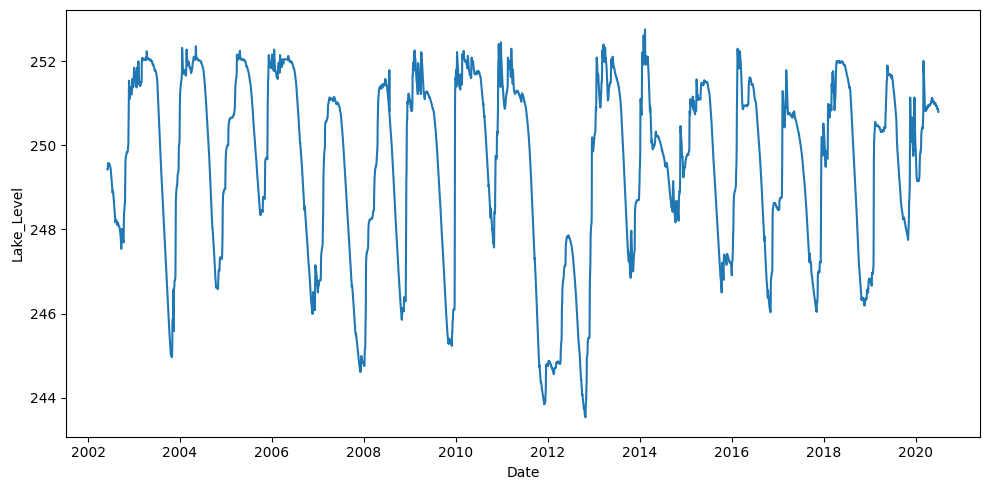

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition =  seasonal_decompose(ts, period=365)

In [30]:
decomposition

**Tendencia**

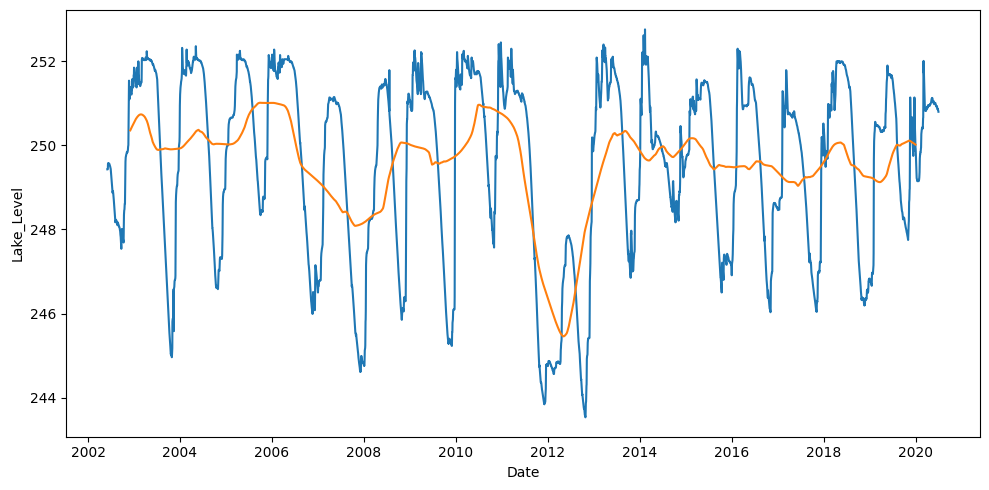

In [31]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

*No es una tendencia tan clara, pero tiende a disminuir, y algo sucede entre 2012-2013, el nivel del lago llegó a su mínimo y se mantuvo un año de déficit*

**Estacionalidad**

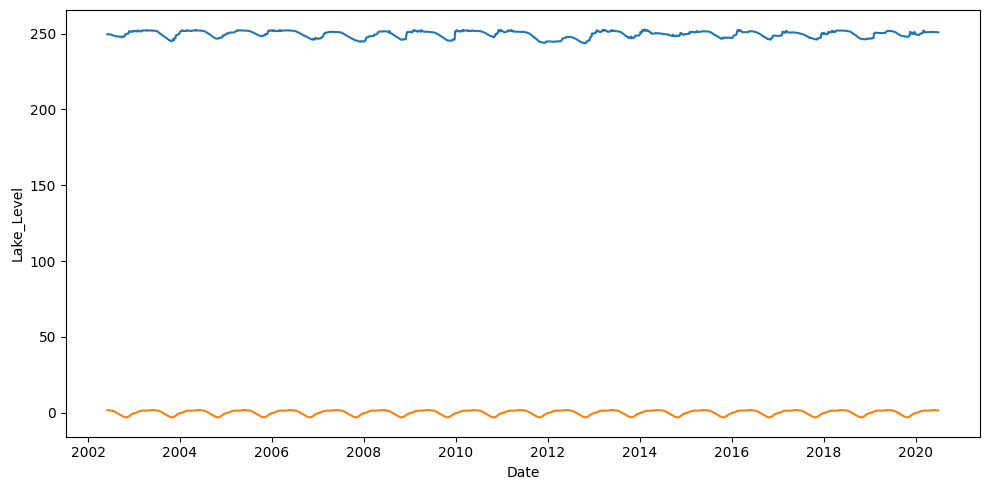

In [32]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -6.880991e+00
p-value                        1.433634e-09
#Lags Used                     3.500000e+01
Number of Observations Used    6.567000e+03
Critical Value (1%)           -3.431346e+00
Critical Value (5%)           -2.861980e+00
Critical Value (10%)          -2.567004e+00
dtype: float64

*la serie es estacionaria*

**Residual**

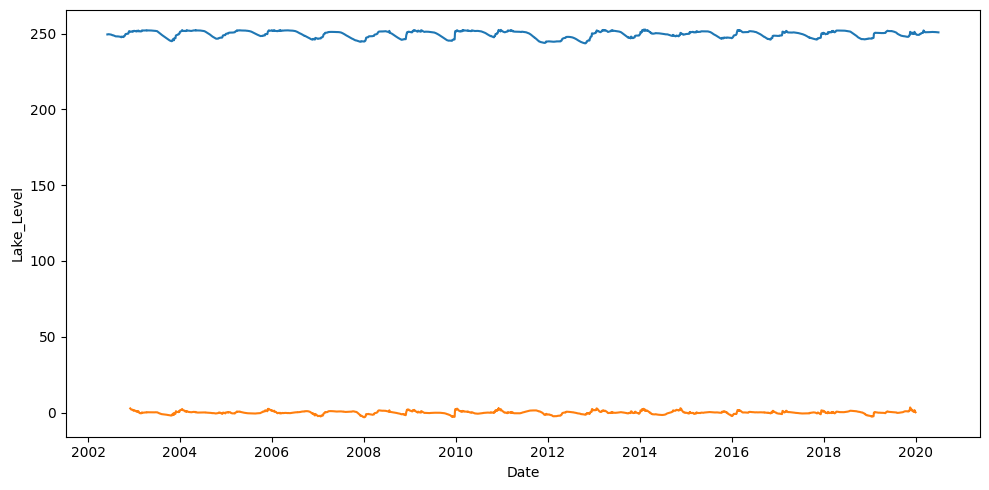

In [34]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

**Autocorrelación**

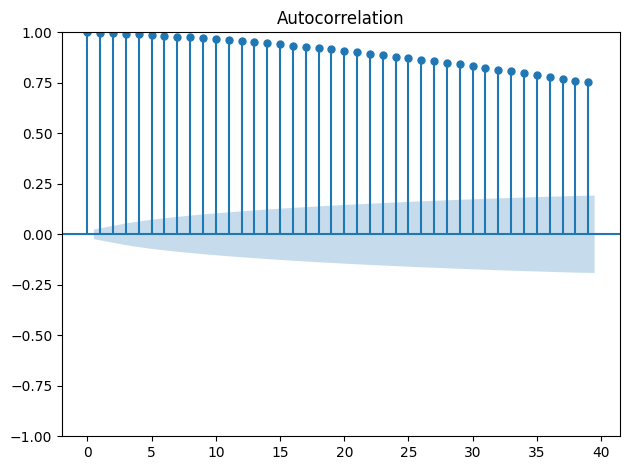

In [35]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()

plt.show()

In [36]:
from pmdarima import auto_arima

model = auto_arima(ts, seasonal = True, trace = True)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject